In this notebook, you will learn how to make your first submission to the [Tabular Playground Series - Mar 2021 competition.](https://www.kaggle.com/c/tabular-playground-series-mar-2021)

# Make the most of this notebook!

You can use the "Copy and Edit" button in the upper right of the page to create your own copy of this notebook and experiment with different models. You can run it as is and then see if you can make improvements.

In [285]:
import numpy as np
import pandas as pd
from pathlib import Path

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Read in the data files

In [286]:
train = pd.read_csv('data/train.csv', index_col='id')
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [287]:
test = pd.read_csv('data/test.csv', index_col='id')
display(test.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
id,,,,,,,,,,,,,,,,,,,,,
5,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
6,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
8,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
9,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
11,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [288]:
train.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

In [289]:
submission = pd.read_csv('data/sample_submission.csv', index_col='id')
display(submission.head())

,target
id,
5,0.5
6,0.5
8,0.5
9,0.5
11,0.5


## We need to encode the categoricals.

There are different strategies to accomplish this, and different approaches will have different performance when using different algorithms.  You may decide to encode features with high cardinality (e.g., more distinct values) diffirently than features with low cardinality. For this starter notebook, we'll use simple encoding.

In [290]:
for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,8,0,1,1,33,0,44,54,0,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,0,8,0,0,4,33,8,48,3,5,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,0,10,0,0,4,33,0,30,38,9,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,0,10,0,2,4,33,0,50,3,5,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,0,8,6,1,4,33,2,32,54,0,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [291]:
train.corr()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
cat0,1.000000,-0.141633,-0.218204,-0.018085,-0.045395,0.103433,-0.090160,0.130663,-0.026857,0.080025,...,0.021756,0.122665,0.140158,0.041943,-0.022477,0.060176,-0.101505,0.063353,0.024911,-0.268109
cat1,-0.141633,1.000000,0.046093,-0.017405,0.023475,0.078907,0.076318,-0.011297,-0.087358,0.085589,...,-0.009844,-0.004205,0.002474,0.108836,0.117922,-0.041102,0.049746,-0.002794,-0.058087,0.112236
cat2,-0.218204,0.046093,1.000000,-0.022521,-0.049333,-0.218566,0.106585,-0.161721,0.112030,-0.252869,...,-0.129947,-0.182265,-0.132696,-0.046255,-0.023292,-0.141121,-0.118450,-0.010660,-0.078994,0.295667
cat3,-0.018085,-0.017405,-0.022521,1.000000,0.032678,0.025903,-0.001105,0.029941,0.025508,-0.066754,...,0.118489,0.077878,0.079587,0.026976,-0.048381,0.121965,0.065498,0.090671,0.141327,0.053099
cat4,-0.045395,0.023475,-0.049333,0.032678,1.000000,0.121178,-0.025572,0.024008,-0.115854,-0.068539,...,0.459956,-0.120948,0.015131,0.260145,0.365562,0.111389,0.432467,0.111771,0.023236,0.194325
cat5,0.103433,0.078907,-0.218566,0.025903,0.121178,1.000000,-0.073885,0.139006,-0.116332,0.106750,...,0.201669,0.214896,0.203334,0.141754,0.093596,0.192966,0.201550,0.098248,0.142016,-0.053626
cat6,-0.090160,0.076318,0.106585,-0.001105,-0.025572,-0.073885,1.000000,-0.058097,0.003935,-0.000935,...,-0.063418,-0.104737,-0.018719,-0.002195,0.023719,-0.118267,-0.022422,-0.068162,-0.098168,0.165252
cat7,0.130663,-0.011297,-0.161721,0.029941,0.024008,0.139006,-0.058097,1.000000,0.002084,0.058839,...,0.128611,0.181920,0.270967,-0.004330,-0.069145,0.160499,0.027880,0.103479,0.165753,-0.123503
cat8,-0.026857,-0.087358,0.112030,0.025508,-0.115854,-0.116332,0.003935,0.002084,1.000000,-0.048659,...,-0.045914,0.073940,-0.012622,-0.157092,-0.243651,0.076333,-0.052344,0.095540,0.151799,-0.018468
cat9,0.080025,0.085589,-0.252869,-0.066754,-0.068539,0.106750,-0.000935,0.058839,-0.048659,1.000000,...,-0.083435,0.081983,0.028608,0.052120,-0.011566,-0.005029,0.004658,0.001350,-0.054377,-0.118097


## Pull out the target, and make a validation split

In [292]:
#PCA não foi uma boa abordagem, piorou os resultados
# target = train.pop('target')

# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# components = pca.fit_transform(train)

# dfPca = pd.DataFrame(data=components, columns=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9', 'component 10'])
# dfPca

In [293]:
#Remover colunas pouco relacionadas também não se mostrou efetivo
#train.drop(['cat3', 'cat8', 'cat5'], axis='columns', inplace=True)

In [294]:
target = train.pop('target')
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.35, random_state=0)

# Simple Random Forest

In previous Tabular Playground Series competition, when the target was continuous, we created a "naive" dummy model, that just predicted the average of the target. That approach is less useful when the scoring metric is AUC, since any constant prediction will score 0.5. So we'll skip that this time, and note that we want to score better than 0.5 for our model to be considered better than naive or random.

In [295]:
#Modificação dos parâmetros do RandomForest foi o que se mostrou mais efetivo para o problema

clf = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=3, criterion="entropy", max_features="log2", warm_start=True, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') # 0.87323 shows we're doing better than a dummy model

0.88035


## Let's take a look at how the model predicted the various classes

The graph below shows that the model does well with most of the negative observations, but struggles with many of the positive observations.

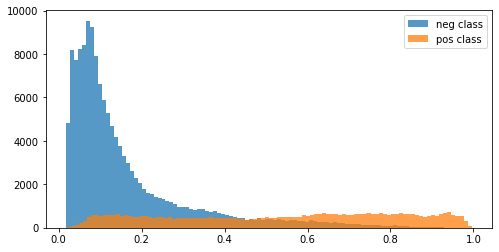

In [296]:
plt.figure(figsize=(8,4))
plt.hist(y_pred[np.where(y_test == 0)], bins=100, alpha=0.75, label='neg class')
plt.hist(y_pred[np.where(y_test == 1)], bins=100, alpha=0.75, label='pos class')
plt.legend()
plt.show()

# Let's train it on all the data and make a submission!

In [297]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=3, criterion="entropy", max_features="log2", warm_start=True, random_state=0)
clf.fit(train, target)
submission['target'] = clf.predict_proba(test)[:, 1]
submission.to_csv('random_forest.csv')

## Now you should save your Notebook (blue button in the upper right), and then when that's complete go to the notebook viewer and make a submission to the competition. :-)

## There's lots of room for improvement. What things can you try to get a better score?